In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import tkinter 
from tkinter import messagebox




Using TensorFlow backend.


In [18]:
img_width,img_height=150,150
train_data_dir='F:\Mini Project\Datasets\Sunflower\Train'
validation_data_dir='F:\Mini Project\Datasets\Sunflower\Validation'
no_training_samples=150
no_validation_samples=30
epochs=9
batch_size=20



In [19]:
if K.image_data_format()=='channels_first':  
    input_shape=(3,img_width, img_height)
else:
    input_shape=(img_width, img_height, 3)
    

In [20]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [21]:
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 327 images belonging to 2 classes.


In [22]:
validation_generator=test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 60 images belonging to 2 classes.


In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.summary()



model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
               metrics=['accuracy'])



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 148, 148, 32)      0         
__________________________________

In [26]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=no_training_samples// batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=no_validation_samples // batch_size)

model.save_weights('first_try.h5')



Epoch 1/9
7/7 [==============================] - 4s 622ms/step - loss: 0.3731 - accuracy: 0.8857 - val_loss: 0.4346 - val_accuracy: 0.8000
Epoch 2/9
7/7 [==============================] - 3s 458ms/step - loss: 0.2939 - accuracy: 0.8929 - val_loss: 0.4372 - val_accuracy: 0.9500
Epoch 3/9
7/7 [==============================] - 2s 289ms/step - loss: 0.2676 - accuracy: 0.9211 - val_loss: 0.2067 - val_accuracy: 0.9000
Epoch 4/9
7/7 [==============================] - 3s 401ms/step - loss: 0.2565 - accuracy: 0.8929 - val_loss: 0.2380 - val_accuracy: 0.9500
Epoch 5/9
7/7 [==============================] - 2s 356ms/step - loss: 0.3185 - accuracy: 0.8643 - val_loss: 0.1691 - val_accuracy: 0.9500
Epoch 6/9
7/7 [==============================] - 3s 366ms/step - loss: 0.2378 - accuracy: 0.9286 - val_loss: 0.1546 - val_accuracy: 0.9500
Epoch 7/9
7/7 [==============================] - 2s 333ms/step - loss: 0.2334 - accuracy: 0.9134 - val_loss: 0.2113 - val_accuracy: 0.9000
Epoch 8/9
7/7 [============

In [13]:

model.save('catsanddogs.h5')





NameError: name 'history' is not defined

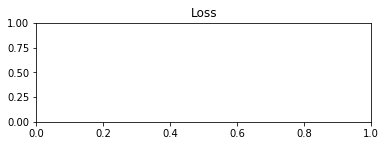

In [11]:
from sklearn.datasets import make_circles

from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [21]:
 from keras.models import load_model
 new_model=load_model('catsanddogs.h5')


In [22]:
import tkinter 
from tkinter import messagebox
from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter import ttk

window=tkinter.Tk()
window.title("Weed Detection Software")

window.geometry('800x500')
bgImage=PhotoImage(file="F:\\Mini Project\\Background\\Background.png")
Label(window,image=bgImage).place(relwidth=1,relheight=1)
e=tkinter.Entry(window,width=10)
e.place(height=20,width=1000,relx=0.3,rely=0.3)





def clickme():
    
   # label2=tkinter.Label(window,text=hello).pack() 
    global s
    s=e.get()
    messagebox.showinfo("Upload Success!","Upload successful")
    img_pred=image.load_img(s,target_size=(150,150))
    img_pred=image.img_to_array(img_pred)
    img_pred=np.expand_dims(img_pred,axis=0)

    rslt=model.predict(img_pred)
    
    if rslt[0][0]==1:
        prediction="It's the Weed"
    else:
        prediction="It's the Sunflower Crop "
    print(prediction)
   
    messagebox.showinfo("Prediction Success!", prediction)
    print(s)
    

txt=tkinter.Entry(window,width=10)

bt=tkinter.Button(window,text="Upload!",bg="darkblue",fg="white",command=clickme)
label2=tkinter.Label(window,text="Enter the location of file in your system")
label2.place(relx=0,rely=0.3)
bt.pack()
bt.place(height=20, width=100,relx=0.5,rely=0.5) 

    



window.mainloop()




ModuleNotFoundError: No module named 'PIL'